#Credit Card Fraud Detection 

In [28]:
import pandas as pd

In [29]:
data = pd.read_csv('creditcard.csv')

In [30]:
data.shape

(284807, 31)

In [31]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
data['Class'].unique()

array([0, 1])

In [33]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [34]:
#value_count to check the class details
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [35]:
#to check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
#by doing this we can can find which values need to be delete/do some precoessing
#round function to see the float instead of all the numbers 
data.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [37]:
#color of value is depend on the value in the coloumn like seires/heatmap
data.describe().round(2).style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.860000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.350000,0.000000
std,47488.150000,1.960000,1.650000,1.520000,1.420000,1.380000,1.330000,1.240000,1.190000,1.100000,1.090000,1.020000,1.000000,1.000000,0.960000,0.920000,0.880000,0.850000,0.840000,0.810000,0.770000,0.730000,0.730000,0.620000,0.610000,0.520000,0.480000,0.400000,0.330000,250.120000,0.040000
min,0.000000,-56.410000,-72.720000,-48.330000,-5.680000,-113.740000,-26.160000,-43.560000,-73.220000,-13.430000,-24.590000,-4.800000,-18.680000,-5.790000,-19.210000,-4.500000,-14.130000,-25.160000,-9.500000,-7.210000,-54.500000,-34.830000,-10.930000,-44.810000,-2.840000,-10.300000,-2.600000,-22.570000,-15.430000,0.000000,0.000000
25%,54201.500000,-0.920000,-0.600000,-0.890000,-0.850000,-0.690000,-0.770000,-0.550000,-0.210000,-0.640000,-0.540000,-0.760000,-0.410000,-0.650000,-0.430000,-0.580000,-0.470000,-0.480000,-0.500000,-0.460000,-0.210000,-0.230000,-0.540000,-0.160000,-0.350000,-0.320000,-0.330000,-0.070000,-0.050000,5.600000,0.000000
50%,84692.000000,0.020000,0.070000,0.180000,-0.020000,-0.050000,-0.270000,0.040000,0.020000,-0.050000,-0.090000,-0.030000,0.140000,-0.010000,0.050000,0.050000,0.070000,-0.070000,-0.000000,0.000000,-0.060000,-0.030000,0.010000,-0.010000,0.040000,0.020000,-0.050000,0.000000,0.010000,22.000000,0.000000
75%,139320.500000,1.320000,0.800000,1.030000,0.740000,0.610000,0.400000,0.570000,0.330000,0.600000,0.450000,0.740000,0.620000,0.660000,0.490000,0.650000,0.520000,0.400000,0.500000,0.460000,0.130000,0.190000,0.530000,0.150000,0.440000,0.350000,0.240000,0.090000,0.080000,77.160000,0.000000
max,172792.000000,2.450000,22.060000,9.380000,16.880000,34.800000,73.300000,120.590000,20.010000,15.590000,23.750000,12.020000,7.850000,7.130000,10.530000,8.880000,17.320000,9.250000,5.040000,5.590000,39.420000,27.200000,10.500000,22.530000,4.580000,7.520000,3.520000,31.610000,33.850000,25691.160000,1.000000


In [38]:
#to see datatype of column
#to check for categorical column 
#if it is then we need to perform OneHotEncoding Method to convert 
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [39]:
#to check whethere their is duplicate values in a data
#which can affect the data
data.duplicated().sum()

1081

In [40]:
#to remove duplicate values
#why we are writing inplace = True so it can process and remove duplicate from orginal data
# if u dont do that then it will show just for view not delete in orginaldata
data.drop_duplicates(inplace = True)

In [42]:
data.shape

(283726, 31)

In [43]:
#to check gain is their any dupicate in data
data.duplicated().sum()

0

#Train and Test Data Creation
- first we need to divide our data into x and y 
- then we need to split our data to creata a train and test model

In [44]:
x = data.iloc[:,0:-1]
y = data.loc[:,'Class'] #data.iloc[:,-1]

In [46]:
print(x.shape)
print(y.shape)

(283726, 30)
(283726,)


In [47]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [48]:
#then we can remove if the features if we dont want in the data
#its upto you decide which u want to drop i decide to drop Time
#axis = 1 for entire column

x.drop('Time', axis = 1,inplace = True)

In [49]:
x.shape

(283726, 29)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

#Pre-Processing Techniques
#standard scaling
- to correct the data which has value with huge difference 
- that type of data cause problem in output of the model
- so we better process the data undo the differences
- if we process the train data we aso need to transform test data

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
ss = StandardScaler()

In [55]:
#we only use x_train to preprocess not y_train
x_train = ss.fit_transform(x_train)

In [90]:
x_test = ss.transform(x_test)

#Model Creation
#we selecting it as a Classification Model
- bigger the data training and testing will take time 
- in bagging which run in parllel 
- in boosting it run one by one (sequential) and this gradient boosting will take more time
- grid search time will take more time
- randomised is fast but we need to mention how much value it should take
- for practice we going to create all the classification model to check which is best and then we can tune it more
- but inreal world it may differ

In [91]:
#to check time taken by model to execute u van use this one
import time
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

start = time.time()
logreg.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)



Time Taken : 2.541642427444458


In [92]:
start = time.time()
print('Train Score : ',logreg.score(x_train,y_train))
print('Test Score : ',logreg.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.9992290069609657
Test Score :  0.9991541254009093
Time Taken : 0.06813287734985352


- in above model we see that logistic regression overfititng 
- traing data is more than testing data
- see we know accuracy is not great score so we can try f1 score / or ur preference
- if u want to compute is score u no need y_predict
- but for f1_score u need y_predict
-f1_score(truevalue,y_pred)

In [93]:
from sklearn.metrics import f1_score
y_pred = logreg.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

F1_Score :  0.6712328767123288


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


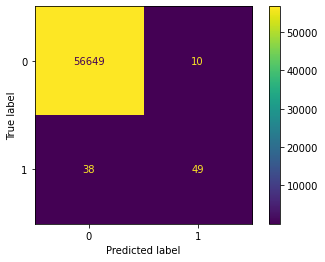

In [94]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg,x_test,y_test)

#SVM Model
- Logistic Regression performed very badly
- So we are trying different model

In [95]:
from sklearn.svm import SVC
svc = SVC()

start = time.time()
svc.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 413.71535992622375


In [96]:
start = time.time()
print('Train Score : ',svc.score(x_train,y_train))
print('Test Score : ',svc.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.9996475460392986
Test Score :  0.9994008388256441
Time Taken : 100.95435237884521


F1_Score :  0.7702702702702702


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


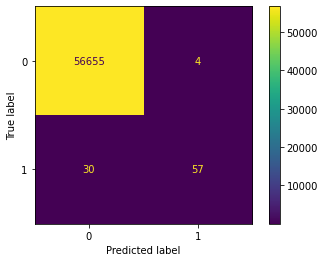

In [97]:
from sklearn.metrics import f1_score
y_pred = svc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,x_test,y_test)

#KNN Model

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

start = time.time()
knn.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.021791696548461914


In [68]:
start = time.time()
print('Train Score : ',knn.score(x_train,y_train))
print('Test Score : ',knn.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.999563838223632


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Test Score :  0.9988545448137314
Time Taken : 1607.7513058185577


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


F1_Score :  0.47154471544715443


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


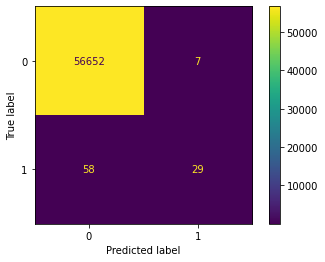

In [69]:
from sklearn.metrics import f1_score
y_pred = knn.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,x_test,y_test)

#Decision Tree Classifier
- feature importance can be used for further process in like PCA Feature Reduction,or feature selection techniques

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

start = time.time()
dtc.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 17.62502884864807


In [99]:
start = time.time()
print('Train Score : ',dtc.score(x_train,y_train))
print('Test Score : ',dtc.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  1.0
Test Score :  0.9991012582384662
Time Taken : 0.06862902641296387


F1_Score :  0.7182320441988951


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


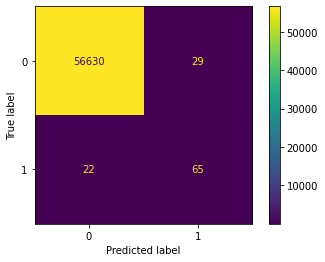

In [100]:
from sklearn.metrics import f1_score
y_pred = dtc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc,x_test,y_test)

In [101]:
dtc.feature_importances_

array([1.58405189e-02, 0.00000000e+00, 1.94631507e-03, 1.68531609e-02,
       2.60632895e-03, 2.02961661e-02, 1.42555677e-02, 2.96778538e-04,
       9.13600979e-03, 3.66154532e-02, 5.05345129e-03, 5.66061288e-02,
       1.77207262e-02, 9.35659305e-02, 1.84326122e-02, 1.50163919e-02,
       5.40877698e-01, 4.05482305e-03, 8.33354359e-03, 1.35568357e-02,
       5.97603794e-03, 1.65761783e-02, 3.90582699e-03, 8.44439326e-03,
       1.46640947e-02, 2.25867756e-02, 3.04705335e-02, 0.00000000e+00,
       6.31171937e-03])

#Ensemble Learning
#RandomForest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

start = time.time()
rfc.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 271.19315576553345


In [103]:
start = time.time()
print('Train Score : ',rfc.score(x_train,y_train))
print('Test Score : ',rfc.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  1.0
Test Score :  0.9995770627004547
Time Taken : 3.467046022415161


F1_Score :  0.8481012658227848


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


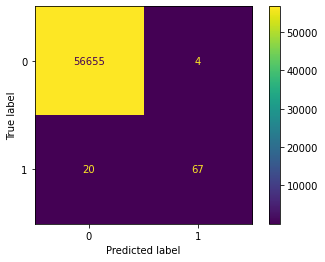

In [104]:
from sklearn.metrics import f1_score
y_pred = rfc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc,x_test,y_test)

#Gradient Boosting Classifier


In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

start = time.time()
gbc.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 367.7157542705536


In [106]:
start = time.time()
print('Train Score : ',gbc.score(x_train,y_train))
print('Test Score : ',gbc.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.9993523658472112
Test Score :  0.9992069925633524
Time Taken : 0.4315612316131592


F1_Score :  0.689655172413793


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


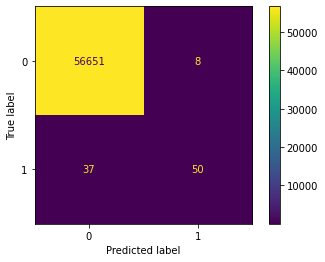

In [107]:
from sklearn.metrics import f1_score
y_pred = gbc.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbc,x_test,y_test)

# Naive Bayes
- when the data is textual and convert to bag of word like conutvectorize we use multinomialNB
- when the data is numerical like we have now we need t use GaussianNB 

In [108]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()

start = time.time()
gb.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.1340479850769043


In [109]:
start = time.time()
print('Train Score : ',gb.score(x_train,y_train))
print('Test Score : ',gb.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.9777072869856375
Test Score :  0.977619567899059
Time Taken : 0.1642591953277588


F1_Score :  0.10056657223796035


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


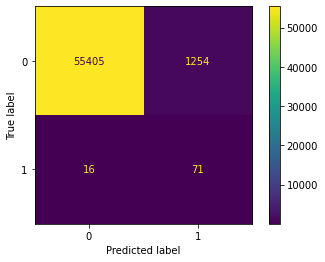

In [110]:
from sklearn.metrics import f1_score
y_pred = gb.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gb,x_test,y_test)

#SGD Classifier

In [111]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

start = time.time()
sgd.fit(x_train,y_train)
end = time.time()
print('Time Taken :',end - start)

Time Taken : 0.7330732345581055


In [112]:
start = time.time()
print('Train Score : ',sgd.score(x_train,y_train))
print('Test Score : ',sgd.score(x_test,y_test))
end = time.time()
print('Time Taken :',end - start)

Train Score :  0.9991408934707904
Test Score :  0.9989602791386177
Time Taken : 0.07401466369628906


F1_Score :  0.5629629629629629


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


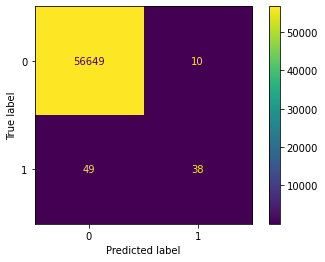

In [113]:
from sklearn.metrics import f1_score
y_pred = sgd.predict(x_test)
print('F1_Score : ',f1_score(y_test,y_pred))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd,x_test,y_test)

#Tuning Model
- Once we tested the model
- we need to tune the model
- lets consider Decsion Tree classifier to tune then proceed accordingly
- but in real we need to do all the above models and take the best one and then we need to tune that particular model to perfection.
- if the below tunning value also can be selected and done for the best model 
- so instead of dtc we can use the best model their with their parameters

#Randomized Search CV

In [114]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [115]:
param_dist = {'max_depth':[3,6,9], 'min_samples_leaf':[3,5,7],'criterion':['gini','entropy']}

In [116]:
#n_iter it shld be 18 depth =3,sampleleaf =3 ,criterion = 2
#so 3*3*2 = 18 but due to take time we are reducing it 
#in rscv if u pass 18 iter but in  its cv is 3 to 5 fold 
#so if u consider that 18*5 = ? that much model it will produce 
#but dur to time consuption cv = 3 we will give 
rscv = RandomizedSearchCV(dtc,param_dist,n_iter = 6,cv = 3)
rscv.fit(x_train,y_train)
print('Best Parameters : ',rscv.best_params_)
print('Best Estimator : ',rscv.best_estimator_)
print('RSCV Test Score : ',rscv.score(x_test,y_test))

Best Parameters :  {'min_samples_leaf': 5, 'max_depth': 6, 'criterion': 'gini'}
Best Estimator :  DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
RSCV Test Score :  0.9994537059880872


#GridSearchCv

In [117]:
gs = GridSearchCV(dtc,param_dist,cv = 3)
gs.fit(x_train,y_train)
print('Best Parameters : ',gs.best_params_)
print('Best Estimator : ',gs.best_estimator_)
print('RSCV Test Score : ',gs.score(x_test,y_test))

Best Parameters :  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3}
Best Estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3)
RSCV Test Score :  0.9994184612131252


#it is Proven that RandomForestClassifier is the BEST Out of all Classification Model for this Data
- so further we need to do Randomsearch or Gridsearch using RandomForest to find the best parameters for further tunning then the score need to be submitted 